#Loading and Preprocessing

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the IMDB dataset
num_words = 10000 # Use top 10,000 words
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=num_words)

# Pad the sequences to ensure all reviews have the same length
maxlen = 500 # Maximum review length (in number of words)
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# Check shapes of the data
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (25000, 500)
Test data shape: (25000, 500)


#Creating RNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.optimizers import Adam

# Build the RNN model
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=num_words, output_dim=128, input_length=maxlen))
model_rnn.add(SimpleRNN(128, activation='relu'))
model_rnn.add(Dense(1, activation='sigmoid')) # Sigmoid for binary classification

# Compile the model
model_rnn.compile(optimizer=Adam(), loss= 'binary_crossentropy', metrics=['accuracy'])

# Train the model
model_rnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
rnn_loss, rnn_acc = model_rnn.evaluate(X_test, y_test)
print(f"RNN Test Accuracy: {rnn_acc:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 90ms/step - accuracy: 0.5551 - loss: 61.3357 - val_accuracy: 0.5632 - val_loss: 0.7001
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - accuracy: 0.6002 - loss: 215.8922 - val_accuracy: 0.6682 - val_loss: 0.5954
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 71ms/step - accuracy: 0.7498 - loss: 0.5043 - val_accuracy: 0.7782 - val_loss: 0.4727
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 70ms/step - accuracy: 0.8563 - loss: 0.3410 - val_accuracy: 0.8148 - val_loss: 0.4224
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step - accuracy: 0.8986 - loss: 0.2515 - val_accuracy: 0.8157 - val_loss: 0.4172
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.8123 - loss: 0.4235
RNN Test Accuracy: 0.8157


# Implementing an LTSM Model for Sentiment Analysis

In [ ]:
from tensorflow.keras.layers import LSTM

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=num_words, output_dim=128, input_length=maxlen))
model_lstm.add(LSTM(128, activation= 'relu'))
model_lstm.add(Dense(1, activation= 'sigmoid')) # Sigmoid for binary classification

# Compile the model
model_lstm.compile(optimizer=Adam(), loss= 'binary_crossentropy', metrics=['accuracy'])

# Train the model
model_lstm.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
lstm_loss, lstm_acc = model_lstm.evaluate(X_test, y_test)
print(f"LSTM Test Accuracy: {lstm_acc:.4f}")

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 94ms/step - accuracy: 0.5103 - loss: nan - val_accuracy: 0.5000 - val_loss: nan
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - accuracy: 0.4949 - loss: nan - val_accuracy: 0.5000 - val_loss: nan
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.5000 - loss: nan - val_accuracy: 0.5000 - val_loss: nan
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 89ms/step - accuracy: 0.4974 - loss: nan - val_accuracy: 0.5000 - val_loss: nan
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 89ms/step - accuracy: 0.4953 - loss: nan - val_accuracy: 0.5000 - val_loss: nan
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.5073 - loss: nan
LSTM Test Accuracy: 0.5000


# Implementing a GRU Model for Sentiment Analysis

In [ ]:
from tensorflow.keras.layers import GRU

# Build the GRU model
model_gru = Sequential()
model_gru.add(Embedding(input_dim=num_words, output_dim=128, input_length=maxlen))
model_gru.add(GRU(128, activation= 'relu'))
model_gru.add(Dense(1, activation= 'sigmoid')) # Sigmoid for binary classification

# Compile the model
model_gru.compile(optimizer=Adam(), loss= 'binary_crossentropy', metrics=['accuracy'])

# Train the model
model_gru.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
gru_loss, gru_acc = model_gru.evaluate(X_test, y_test)
print(f"GRU Test Accuracy: {gru_acc:.4f}")

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


391/391 ━━━━━━━━━━━━━━━━━━━━ 52s 124ms/step - accuracy: 0.5194 - loss: nan - val_accuracy: 0.5000 - val_loss: nan
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 78s 117ms/step - accuracy: 0.5000 - loss: nan - val_accuracy: 0.5000 - val_loss: nan
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 117ms/step - accuracy: 0.5002 - loss: nan - val_accuracy: 0.5000 - val_loss: nan
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 117ms/step - accuracy: 0.4981 - loss: nan - val_accuracy: 0.5000 - val_loss: nan
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 117ms/step - accuracy: 0.5011 - loss: nan - val_accuracy: 0.5000 - val_loss: nan
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.5073 - loss: nan
GRU Test Accuracy: 0.5000


# Comparing the Performance of RNN, LSTM, and GRU

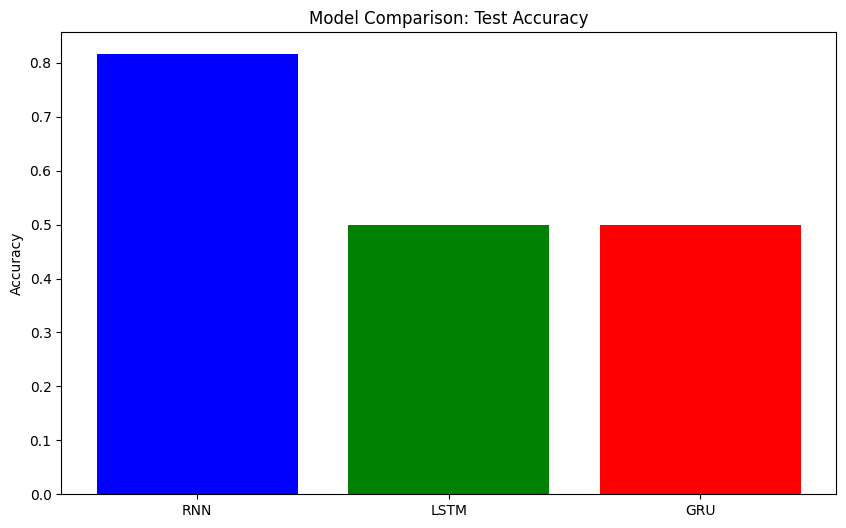

In [ ]:
import matplotlib.pyplot as plt

# Store the accuracy values for comparison
rnn_accs = [rnn_acc]
lstm_accs = [lstm_acc]
gru_accs = [gru_acc]

# Plotting the accuracies of each model
plt.figure(figsize=(10, 6))
plt.bar(['RNN', 'LSTM', 'GRU'], [rnn_acc, lstm_acc, gru_acc], color=['blue', 'green', 'red'])
plt.title("Model Comparison: Test Accuracy")
plt.ylabel("Accuracy")
plt.show()

# Additional Experiment

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all')
texts, labels = newsgroups.data, newsgroups.target

In [ ]:
# Tokenize the texts
num_words = 10000  # Use top 10,000 words
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(texts)

In [ ]:
# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(texts)

In [ ]:
# Pad the sequences to ensure uniform length
maxlen = 500  # Maximum document length (in number of words)
X = pad_sequences(sequences, maxlen=maxlen)

In [ ]:
# Encode the labels into integers
encoder = LabelEncoder()
y = encoder.fit_transform(labels)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes of the data
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (15076, 500)
Test data shape: (3770, 500)


In [ ]:
# Number of categories
num_classes = len(newsgroups.target_names)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.optimizers import Adam

In [ ]:
# Build the RNN model
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=num_words, output_dim=128, input_length=maxlen))
model_rnn.add(SimpleRNN(128, activation='relu'))
model_rnn.add(Dense(num_classes, activation='sigmoid'))  # Sigmoid for multi-class classification

# Compile the model
model_rnn.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_rnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
rnn_loss, rnn_acc = model_rnn.evaluate(X_test, y_test)
print(f"RNN Test Accuracy: {rnn_acc:.4f}")

Epoch 1/5
236/236 ━━━━━━━━━━━━━━━━━━━━ 19s 66ms/step - accuracy: 0.1526 - loss: 46.6692 - val_accuracy: 0.2989 - val_loss: 2.8418
Epoch 2/5
236/236 ━━━━━━━━━━━━━━━━━━━━ 17s 58ms/step - accuracy: 0.3931 - loss: 2.7689 - val_accuracy: 0.3347 - val_loss: 2.6501
Epoch 3/5
236/236 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.4566 - loss: 2.4705 - val_accuracy: 0.3663 - val_loss: 2.3587
Epoch 4/5
236/236 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - accuracy: 0.5343 - loss: 2.0559 - val_accuracy: 0.3194 - val_loss: 2.4607
Epoch 5/5
236/236 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.4654 - loss: 2.1941 - val_accuracy: 0.3729 - val_loss: 2.3073
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.3722 - loss: 2.3198
RNN Test Accuracy: 0.3729


In [ ]:
from tensorflow.keras.layers import LSTM

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=num_words, output_dim=128, input_length=maxlen))
model_lstm.add(LSTM(128, activation='relu'))
model_lstm.add(Dense(num_classes, activation='sigmoid'))  # Sigmoid for multi-class classification

# Compile the model
model_lstm.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_lstm.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
lstm_loss, lstm_acc = model_lstm.evaluate(X_test, y_test)
print(f"LSTM Test Accuracy: {lstm_acc:.4f}")

Epoch 1/5
236/236 ━━━━━━━━━━━━━━━━━━━━ 23s 87ms/step - accuracy: 0.0571 - loss: nan - val_accuracy: 0.0361 - val_loss: nan
Epoch 2/5
236/236 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - accuracy: 0.0310 - loss: nan - val_accuracy: 0.0361 - val_loss: nan
Epoch 3/5
236/236 ━━━━━━━━━━━━━━━━━━━━ 21s 72ms/step - accuracy: 0.0300 - loss: nan - val_accuracy: 0.0361 - val_loss: nan
Epoch 4/5
236/236 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - accuracy: 0.0341 - loss: nan - val_accuracy: 0.0361 - val_loss: nan
Epoch 5/5
236/236 ━━━━━━━━━━━━━━━━━━━━ 21s 72ms/step - accuracy: 0.0310 - loss: nan - val_accuracy: 0.0361 - val_loss: nan
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.0398 - loss: nan
LSTM Test Accuracy: 0.0361


In [ ]:
from tensorflow.keras.layers import GRU

# Build the GRU model
model_gru = Sequential()
model_gru.add(Embedding(input_dim=num_words, output_dim=128, input_length=maxlen))
model_gru.add(GRU(128, activation='relu'))
model_gru.add(Dense(num_classes, activation='softmax'))  # Softmax for multi-class classification

# Compile the model
model_gru.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_gru.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
gru_loss, gru_acc = model_gru.evaluate(X_test, y_test)
print(f"GRU Test Accuracy: {gru_acc:.4f}")

Epoch 1/5
236/236 ━━━━━━━━━━━━━━━━━━━━ 29s 111ms/step - accuracy: 0.0743 - loss: nan - val_accuracy: 0.0361 - val_loss: nan
Epoch 2/5
236/236 ━━━━━━━━━━━━━━━━━━━━ 25s 104ms/step - accuracy: 0.0332 - loss: nan - val_accuracy: 0.0361 - val_loss: nan
Epoch 3/5
236/236 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.0311 - loss: nan - val_accuracy: 0.0361 - val_loss: nan
Epoch 4/5
236/236 ━━━━━━━━━━━━━━━━━━━━ 41s 104ms/step - accuracy: 0.0330 - loss: nan - val_accuracy: 0.0361 - val_loss: nan
Epoch 5/5
236/236 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.0326 - loss: nan - val_accuracy: 0.0361 - val_loss: nan
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.0398 - loss: nan
GRU Test Accuracy: 0.0361
